# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1434

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
raw_data = pd.DataFrame(columns =("City","Latitude","Max Temp","Wind Speed","Cloudiness","Description", "Humidity"))

In [4]:
# Enter your API key here
api_key = "b9eda530467618ee7b488b14c39de25c"
  
# base_url variable to store url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#loop
for city_name in cities:
  
    # complete_url variable to store
    # complete url address
    complete_url = base_url + "appid=" + api_key + "&q=" + city_name
  
    # get method of requests module
    # return response object
    response = requests.get(complete_url)
  
    # json method of response object 
    # convert json format data into
    # python format data
    x = response.json()
  
    # Now x contains list of nested dictionaries
    # Check the value of "cod" key is equal to
    # "404", means city is found otherwise,
    # city is not found
    if x["cod"] != "404":
  
        # store the value of "main"
        # key in variable y
        y = x["main"]
        y1 = x["wind"]
        y2 = x["clouds"]
        y3 = x["coord"]
  
        # store the value corresponding
        # to the "temp" key of y
        current_temperature = y["temp_max"]
  
        # store the value corresponding
        # to the "clouds" key of y
        current_clouds = y2["all"]
      
        # store the value corresponding
        # to the "humidity" key of y
        current_humidity = y["humidity"]
    
         # store the value corresponding
        # to the "wind" key of y
        current_wind = y1["speed"]
  
        # store the value of "weather"
        # key in variable z
        z = x["weather"]
        
        lat = y3["lat"]
  
        # store the value corresponding 
        # to the "description" key at 
        # the 0th index of z
        weather_description = z[0]["description"]
  
        # print following values
        print(current_temperature, current_clouds, current_humidity, current_wind, weather_description, city_name, lat) 
        row_to_add = {'City':city_name,'Latitude':lat,'Max Temp':current_temperature,'Cloudiness':current_clouds,'Wind Speed':current_wind,'Description':weather_description,'Humidity':current_humidity}
        raw_data = raw_data.append(row_to_add, ignore_index = True)
   
        
    else:
        print(" City Not Found ")

276.48 40 93 8.75 scattered clouds torbay 47.6666
300.15 20 65 5.14 few clouds kapaa 22.0752
268.4 100 88 1.91 overcast clouds upernavik 72.7868
292.99 2 61 2.75 clear sky muzaffarabad 34.37
297.15 0 69 3.09 clear sky saint-philippe -21.3585
302.24 85 72 6.82 overcast clouds butaritari 3.0707
296.06 0 80 3.64 clear sky arraial do cabo -22.9661
300.15 20 78 3.09 few clouds puerto escondido 15.85
276.15 90 56 3.09 overcast clouds thompson 55.7435
294.81 0 83 5.77 clear sky cidreira -30.1811
297.15 75 73 5.66 broken clouds nishihara 26.1842
285.93 97 87 4.47 moderate rain mataura -46.1927
289.64 8 83 1.11 clear sky ribeira grande 38.5167
299.16 9 83 7.55 light rain rikitea -23.1203
293.44 48 68 2.11 scattered clouds airai -8.9266
299.15 75 73 4.63 broken clouds vaini -21.2
271.49 100 90 2.88 overcast clouds tiksi 71.6872
290.53 0 70 4.28 clear sky san quintin 30.4833
288.15 0 77 3.09 clear sky mar del plata -38.0023
275.37 90 93 5 moderate rain nikolskoye 59.7035
276.15 75 81 11.83 broken

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         1327 non-null   object 
 1   Latitude     1327 non-null   float64
 2   Max Temp     1327 non-null   float64
 3   Wind Speed   1327 non-null   float64
 4   Cloudiness   1327 non-null   object 
 5   Description  1327 non-null   object 
 6   Humidity     1327 non-null   object 
dtypes: float64(3), object(4)
memory usage: 72.7+ KB


In [6]:
raw_data['Cloudiness'] = raw_data['Cloudiness'].astype(float)
raw_data['Humidity'] = raw_data['Humidity'].astype(float)
raw_data

,City,Latitude,Max Temp,Wind Speed,Cloudiness,Description,Humidity
0,torbay,47.6666,276.48,8.75,40.0,scattered clouds,93.0
1,kapaa,22.0752,300.15,5.14,20.0,few clouds,65.0
2,upernavik,72.7868,268.40,1.91,100.0,overcast clouds,88.0
3,muzaffarabad,34.3700,292.99,2.75,2.0,clear sky,61.0
4,saint-philippe,-21.3585,297.15,3.09,0.0,clear sky,69.0
...,...,...,...,...,...,...,...
1322,omsukchan,62.5333,270.16,2.24,18.0,few clouds,72.0
1323,yining,29.0361,292.00,1.46,100.0,overcast clouds,93.0
1324,brownsville,25.9018,301.15,7.20,1.0,clear sky,78.0
1325,capelinha,-17.6914,287.03,1.57,5.0,clear sky,94.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
clean_city_high_humidity = raw_data[raw_data['Humidity'] > 100.0]
len(clean_city_high_humidity)

0

In [8]:
#  Get the indices of cities that have humidity over 100%.
# 
#  This step seems unnecessary, even if there is high humidity data, as we can remove those
#  entries in a much simpler way

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_data[raw_data['Humidity'] <= 100.0]

In [10]:
# Export the clean city data here:

clean_city_data.to_csv(r'./clean_city_data.csv')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

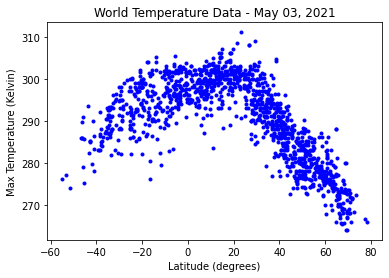

In [11]:
from datetime import date

today = date.today()
d2 = today.strftime("%B %d, %Y")

plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % d2)
plt.savefig('World_Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

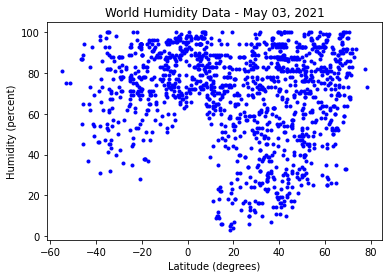

In [12]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Humidity'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (percent)')
plt.title('World Humidity Data - %s' % d2)
plt.savefig('World_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

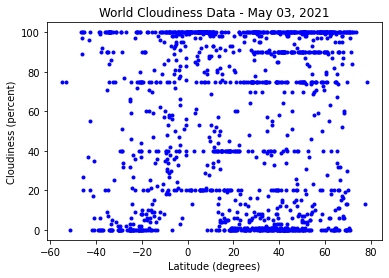

In [13]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Cloudiness'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (percent)')
plt.title('World Cloudiness Data - %s' % d2)
plt.savefig('World_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

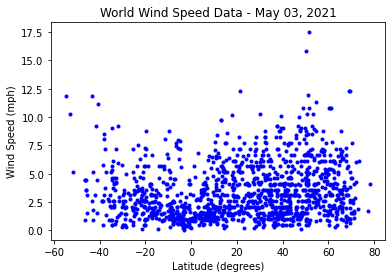

In [14]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Wind Speed'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title('World Wind Speed Data - %s' % d2)
plt.savefig('World_WindSpeed.png')
plt.show()

## Linear Regression

In [15]:
def linear_plot(x,y,xstring,ystring,thistitle):
    res = linregress(x, y)
    
    from datetime import date

    today = date.today()
    d2 = today.strftime("%B %d, %Y")

    plt.plot(x,y,'b.',label='Data')
    plt.plot(x, res.intercept + res.slope*x, 'r-', label='Linear Fit')
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    plt.title(thistitle % d2)
    plt.legend()
    plt.show()

    from scipy.stats import t
    tinv = lambda p, dof: abs(t.ppf(p/2, dof))
    ts = tinv(0.05, len(x)-2)
    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")

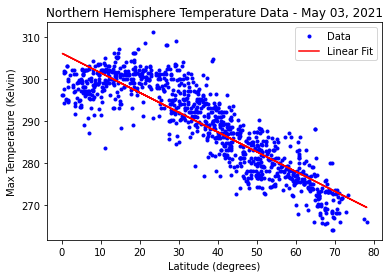

R-squared: 0.769558
slope (95%): -0.469115 +/- 0.016200


In [16]:
clean_city_north = clean_city_data[clean_city_data['Latitude']>0.0]

linear_plot(clean_city_north['Latitude'],clean_city_north['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Northern Hemisphere Temperature Data - %s')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

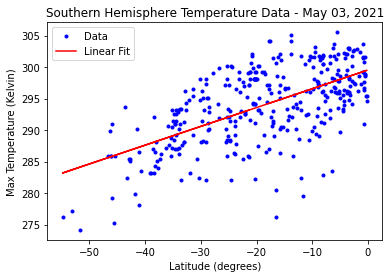

R-squared: 0.383321
slope (95%): 0.298656 +/- 0.039484


In [17]:
clean_city_south = clean_city_data[clean_city_data['Latitude']<0.0]

linear_plot(clean_city_south['Latitude'],clean_city_south['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Southern Hemisphere Temperature Data - %s')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

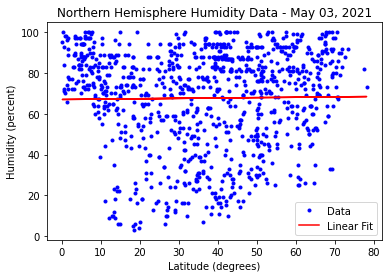

R-squared: 0.000210
slope (95%): 0.018144 +/- 0.078925


In [18]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Humidity'],'Latitude (degrees)','Humidity (percent)','Northern Hemisphere Humidity Data - %s')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

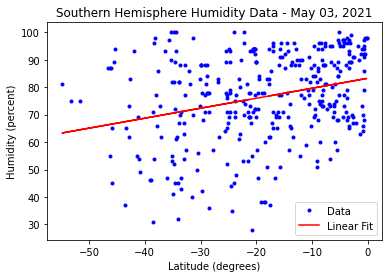

R-squared: 0.082348
slope (95%): 0.363254 +/- 0.126394


In [19]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Humidity'],'Latitude (degrees)','Humidity (percent)','Southern Hemisphere Humidity Data - %s')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

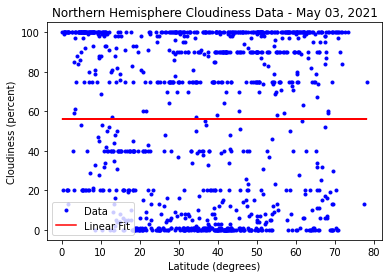

R-squared: 0.000000
slope (95%): 0.001147 +/- 0.133915


In [20]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Northern Hemisphere Cloudiness Data - %s')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

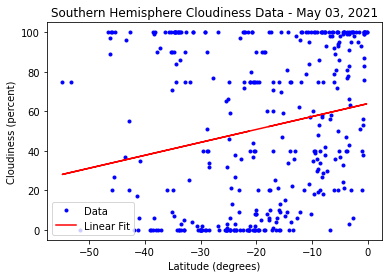

R-squared: 0.043289
slope (95%): 0.653379 +/- 0.320162


In [21]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Southern Hemisphere Cloudiness Data - %s')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

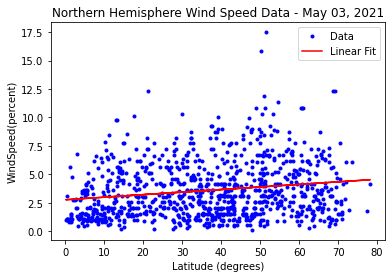

R-squared: 0.032632
slope (95%): 0.022524 +/- 0.007739


In [22]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Northern Hemisphere Wind Speed Data - %s')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

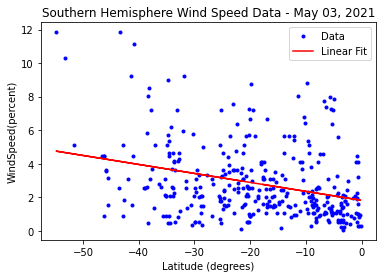

R-squared: 0.097899
slope (95%): -0.053566 +/- 0.016949


In [23]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Southern Hemisphere Wind Speed Data - %s')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [24]:
# Now, let's do the fit of temperature vs. latitude correctly!!! 

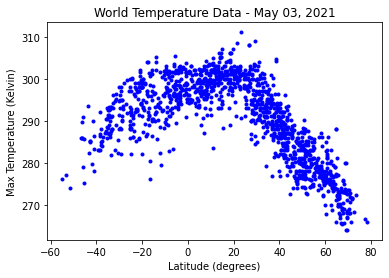

In [25]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % d2)
plt.savefig('World_Temperature.png')
plt.show()

Coefficients (from curve_fit)
[ 34.12288052   4.11870217 300.37402824]
Covariance Matrix (from curve_fit)
[[3.08225340e-01 8.38065146e-02 7.34265491e-02]
 [8.38065146e-02 1.17815857e-01 2.52400253e-04]
 [7.34265491e-02 2.52400253e-04 3.70966398e-02]]

Final Result: y = (300.37 +/- 0.19)  - (34.12 +/- 0.56)*sin^2(Pi/180(x - (4.12 +/- 0.34)) 
R-squared: 0.779609


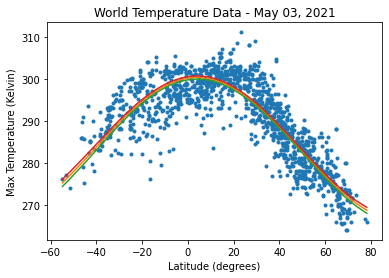

In [26]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[2]-paramlist[0]*(np.sin(np.pi/180.0*(x-paramlist[1])))**2
    #return paramlist[0]*np.cos(np.pi/180.0*(x-paramlist[1]))+paramlist[2]

init_vals = [35.0,3.0,300.0]

clean_city_data = clean_city_data.sort_values(by=['Latitude'])

xi = clean_city_data['Latitude']
yi = clean_city_data['Max Temp']

popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f)  - (%0.2f +/- %0.2f)*sin^2(Pi/180(x - (%0.2f +/- %0.2f)) " % (popt[2],perr[2],popt[0],perr[0],popt[1],perr[1]))
#print ("Final Result: y = (%0.2f +/- %0.2f) x cos(Pi/180(x - (%0.2f +/- %0.2f)) + (%0.2f +/- %0.2f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

residuals = yi - fitfunction(xi, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((yi-np.mean(yi))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared:.6f}")

plt.plot(xi,yi,'.')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % d2)
plt.show()

In [27]:
# What might we expect?
#
# The earth's rotational axis is perpendicular to the earth-sun axis on the spring and fall equinoxes 
# (March 21 and September 21).  On these dates the sun is directly over the equator.  
# The rotational axis is parallel to the earth-sun axes on the summer and winter solstaces 
# (June 21 and December 21).  On these dates, the sun is directly over the Tropics of Cancer 
# and Capricorn, respectively.  The tilt of the earth's axis is 23.5 degrees.  Today is May 3rd.  
# It has been 43 days since the spring equinox.  Therefore, the sun is directly over the latitude 
# corresponding to:  (43/(0.25*365))*23.5 = 11.1 degrees.